# This Is How RUST Is Used By (Modern/Looking-Ahead/Running-Ahead) Developers Today
# THIS is Why it's time to engage with Rust
# THIS is How RUST Is Used by Developers Today


## 1- INTRODUCTION

According to the [2023 Stack Overflow Annual Survey](https://survey.stackoverflow.co/2023/), the **Rust** language is in its eighth year as the most loved and admired language among professionnal developers (with 80% of developers saying they want to continue using it). 

The Rust language is contantly growing in popularity, from 3.2% in 2019 to 13.05% in 2023, and it is winning its place on the map viable computing options.

As a forward-looking developer, you can turn to your favorite search engine to research, read and learn more about the usual questions related to the emergence of such a language:
 What is Rust? What is it used for? Who is using Rust? Should I learn and engage with Rust in 2023? 

You may also take a look at the [2023 Stack Overflow Annual Survey](https://survey.stackoverflow.co/2023/) 
which is conducted every year among tens of thousands of developers who share how they learn new and level up, 
which tools they’re using, how much they earn and how they are looking ahead to the future.

The last survey was conducted in May 2023 among 90,000 developers and the results can be downloaded from:
- https://insights.stackoverflow.com/survey  

This kind of survey provides a wealth of information about the software developer community, the tools and the 
programming environments in use today.
With respect to the Rust language, you will find the following information:
- the number of users and its [popularity](https://survey.stackoverflow.co/2023/#section-most-popular-technologies-programming-scripting-and-markup-languages) compared to other technologies  
- the user satisfaction, apprehension and [desire to use](https://survey.stackoverflow.co/2023/#section-admired-and-desired-programming-scripting-and-markup-languages)
- the [pay rating](https://survey.stackoverflow.co/2023/#section-top-paying-technologies-top-paying-technologies) among other languages
- and a nice [mapping](https://survey.stackoverflow.co/2023/#section-worked-with-vs-want-to-work-with-programming-scripting-and-markup-languages) of the languages that users are interested in versus the ones they are already using. 

### Business Questions
 
We will be working with the resulting dataset from the 2023 Stack Overflow Annual Developer Survey.
We intend to ask some of the following 3 questions:
- 1) What kind of develpment work do the Rust lovers do?
- 2) What kind of develpment work do the Rust admirers do?
- 3) How long have they been coding, (how old are they)
- 4) How is Rust used in small vs large organizations?
- 5) What do the Rust users want to lear next
- 6) What kind of [CloudPlatform/WebFramework/DeveloperTools/OtherFrameworks] --> Distibution par ces 4 familles? 
- 7) See other distributions at the end of the survey.
- 8) What other languages do Rust lovers use?
- 10) Finish with a student approach if worth.


## 2- GETTING TO KNOW THE DATASET
In this section, we take a look at the dataset and we start wrangling the data to better understand the characteristics of the dataset.

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

%matplotlib inline

# Set the verbosity to [0|1|2|..]
VERBOSE = 3

### 2.1 CSV file and data shape

In [305]:
df = pd.read_csv('../dataset/survey_results_public.csv')
schema = pd.read_csv('../dataset/survey_results_schema.csv')

respondents = df.shape[0]
num_cols    = df.shape[1]

print(f"\n[INFO][SURVEY] The dataset contains {respondents} rows and {num_cols} columns.")

df.head(3)


[INFO][SURVEY] The dataset contains 89184 rows and 84 columns.


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0


### 2.2 Continuous variables
Surprinsingly, the 2023 survey does not provide many continuous variables. This will make it harder to  build a predictive model because we'll need to invest more work into infering many values from categorical variables. Therefore, we'll stick to a descriptive statistics analysis for this exercise. 

In [306]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


array([[<Axes: title={'center': 'ResponseId'}>,
        <Axes: title={'center': 'CompTotal'}>],
       [<Axes: title={'center': 'WorkExp'}>,
        <Axes: title={'center': 'ConvertedCompYearly'}>]], dtype=object)

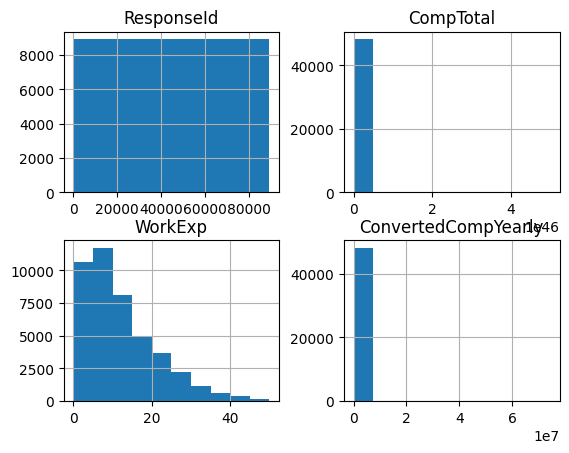

In [307]:
df.hist()

### 2.1- Utility and Helpers Functions

In [238]:
def pie_chart(df, title, fig_save=False):
    """
    Plots a pie chart showing the proportions of the passed series.
    """
    (df.nlargest(10)/df.sum()).plot(kind='pie', autopct='%1.1f%%', ylabel='', legend=None);
    plt.title(title);
    if fig_save:
        plt.fig_save('./images/' + title.replace(" ", "_") +'.jpg')
    plt.show();
    
help(pie_chart)

Help on function pie_chart in module __main__:

pie_chart(df, title, fig_save=False)
    Plots a pie chart showing the proportions of the passed series.



In [239]:
def two_pie_chart(df1, df1_title, df2, df2_title, mode, fig_title, fig_save=False):
    """
    Plots two pie charts together and showing the proportions of the passed series.
    
    Parameters:
      df1 (DataFrame): First data frame
      df1_title (string): The title of the 1st pie chart
      df2 (DataFrame): Second data frame
      df2_title (string): The title of the 2ndt pie chart
      mode (string): To display the sub-plots side-by-side (mode='row) or top-bottom (mode='col').
      fig_title(string): The name of the figure to save.
      fig_save (boolean): Will keep a copy of the figure in './images/' directory)
    """
    if mode == 'row':
        fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 12))
        fig.subplots_adjust(wspace=0.4)
    elif mode == 'col':
        fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(14, 12))
        fig.subplots_adjust(wspace=0.4)
        
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    
    # Only plot the 10 largest values
    (df1.nlargest(10)/df1.sum()).plot(ax=axes[0], kind='pie', autopct='%1.1f%%', ylabel='', title=df1_title, legend=None);
    (df2.nlargest(10)/df2.sum()).plot(ax=axes[1], kind='pie', autopct='%1.1f%%', ylabel='', title=df2_title, legend=None);

    if fig_save:
        plt.fig_save('./images/' + fig_title.replace(" ", "_") +'.jpg')
    plt.show()
    
help(two_pie_chart)

Help on function two_pie_chart in module __main__:

two_pie_chart(df1, df1_title, df2, df2_title, mode, fig_title, fig_save=False)
    Plots two pie charts together and showing the proportions of the passed series.
    
    Parameters:
      df1 (DataFrame): First data frame
      df1_title (string): The title of the 1st pie chart
      df2 (DataFrame): Second data frame
      df2_title (string): The title of the 2ndt pie chart
      mode (string): To display the sub-plots side-by-side (mode='row) or top-bottom (mode='col').
      fig_title(string): The name of the figure to save.
      fig_save (boolean): Will keep a copy of the figure in './images/' directory)



In [330]:
def barh_chart(sr, fig_title, color, fig_save=False):
    """
    Plots an horizontal bar chart per job type.
    
    Parameters:
      sr (Series): A serie of values
      sr_title (string): The title of the bar chart figure
      color (string): The color of the bars in RGB color code
      fig_save (boolean): Will keep a copy of the figure in './images/' directory)
    """
    
    # [Credits] This code is inspired from https://mode.com/example-gallery/python_horizontal_bar/
    
    # Convert the serie into a DataFrame
    df = pd.DataFrame(sr)

    # Add a new column 'Percentage' to the DataFrame
    if 'count' in df.columns:
        total = df['count'].sum()
        df['Percentage'] = df['count'] / total * 100
    
    # Truncate the dataframe above 30
    if len(sr) > 30:
        sr = sr.head(30)
        df = df.head(30)
    ax = sr.plot(kind='barh', figsize=(8, 10), color=color, zorder=2, width=0.85)
          
    # Add a title
    plt.title(fig_title, loc='left');
   
    # Remove the lines that border the data area of a plot (aka spines)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
   
    # Switch off the ticks
    ax.tick_params(axis="both", which="both", 
                   bottom="off", left="off", 
                   labelbottom="off", labelleft="off")

    # Draw vertical axis lines
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    if 'count' in df.columns:
        ax.set_xlabel("Number of Responses", labelpad=20, weight='bold', size=12)
    elif 'ConvertedCompYearly' in df.columns:
        ax.set_xlabel("Median salary (in USD)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    ax.set_ylabel("Job Type", labelpad=20, weight='bold', size=12)
    
    # Add percentages as text annotations
    if 'count' in df.columns and 'Percentage' in df:
        for i, value in enumerate(df['count']):
            ax.text(value, i, f' {df["Percentage"][i]:.1f}%', ha='left', va='center')
        
help(barh_chart)

Help on function barh_chart in module __main__:

barh_chart(sr, fig_title, color, fig_save=False)
    Plots an horizontal bar chart per job type.
    
    Parameters:
      sr (Series): A serie of values
      sr_title (string): The title of the bar chart figure
      color (string): The color of the bars in RGB color code
      fig_save (boolean): Will keep a copy of the figure in './images/' directory)



## 3- DATA PREPARATION

### 3.1- Refining the statistical population per branch
The survey collects responses from people belonging to various branches.
However, we are only interrested in the group of **professional developers**.


[INFO][SURVEY] The 'MainBranch' column of the survey contains the following answers:
MainBranch
I am a developer by profession                                                           67237
I am not primarily a developer, but I write code sometimes as part of my work/studies     8954
I am learning to code                                                                     4961
I code primarily as a hobby                                                               4960
I used to be a developer by profession, but no longer am                                  1861
None of these                                                                             1211
Name: count, dtype: int64


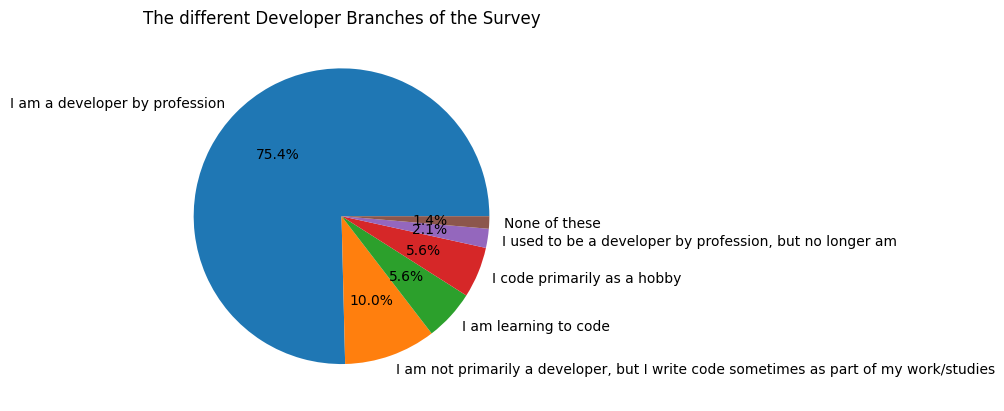

[INFO][STUDY] Our investigation will solely focus on the population of 'developers by profession' who are 67237 and represent 75.4% of the respondents.

[INFO][STUDY] The 'MainBranch' column of the study contains the following answers:
MainBranch
I am a developer by profession    67237
Name: count, dtype: int64


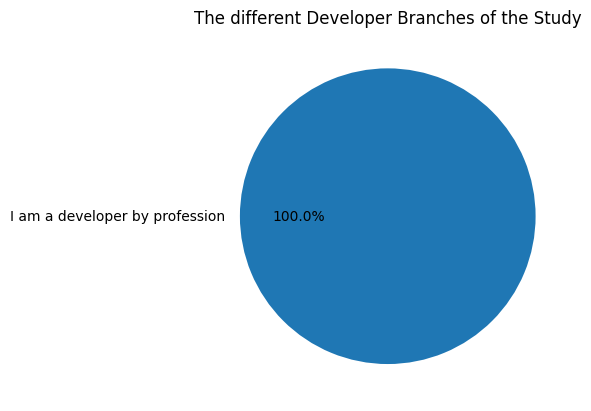

In [240]:
# STEP-0: Get to know the content of the 'MainBranch' column
if VERBOSE > 2:
    print(f"\n[INFO][SURVEY] The \'MainBranch\' column of the survey contains the following answers:")
    print(df['MainBranch'].value_counts(dropna=False))
    pie_chart(df.MainBranch.value_counts(), "The different Developer Branches of the Survey", fig_save=False)

# STEP-1: Create a subset of the dataset containing only professional developers.
#         We use the question "_ID2/MainBranch/Which of the following Developer Branches best describes you today?_". 
df_developers = df[df['MainBranch'] == 'I am a developer by profession']
developers_by_profession = df_developers.shape[0]
print(f"[INFO][STUDY] Our investigation will solely focus on the population of \'developers by profession\' who are {developers_by_profession} and represent {(100*developers_by_profession/respondents):.1f}% of the respondents.")

# STEP-2: Display the resulting pie chart
if VERBOSE > 2:
    print(f"\n[INFO][STUDY] The \'MainBranch\' column of the study contains the following answers:")
    print(df_developers.MainBranch.value_counts(dropna=False))
if VERBOSE > 1:
    pie_chart(df_developers.MainBranch.value_counts(), "The different Developer Branches of the Study", fig_save=False)    

### 3.2- Refining the statistical population per employment
The survey collects responses from people having various employment status.
This study will skip the full-time students and will solely focus on the **employed developers**.


[INFO][SURVEY] The 'Employment' column of the survey contains the following answers:
Employment
Employed, full-time                                                                                                                                                                                             53748
Student, full-time                                                                                                                                                                                               7430
Independent contractor, freelancer, or self-employed                                                                                                                                                             7076
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                         4354
Not employed, but looking for work             

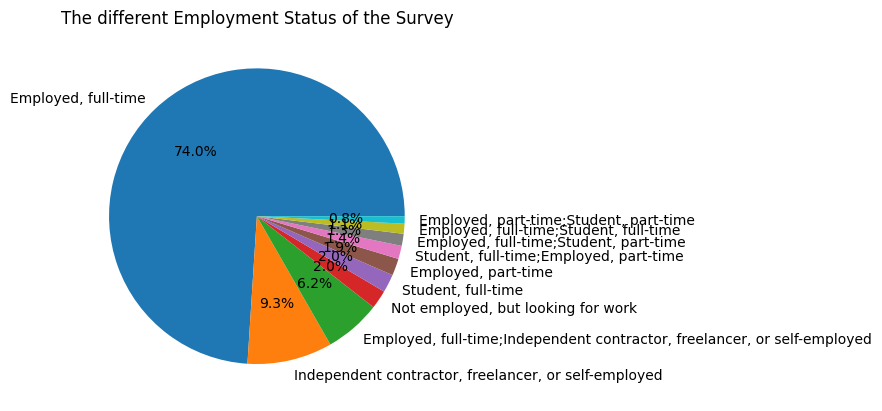

[INFO][STUDY] Our investigation will solely focus on the population of 'active developers by profession' who are 62746 and represent 70.4% of the respondents.

[INFO][STUDY] The 'Employment' column of the study contains the following answers:
Employment
Employed, full-time                                                                                                                47441
Independent contractor, freelancer, or self-employed                                                                                5963
Employed, full-time;Independent contractor, freelancer, or self-employed                                                            3959
Not employed, but looking for work                                                                                                  1301
Employed, part-time                                                                                                                 1187
Employed, full-time;Student, part-time                       

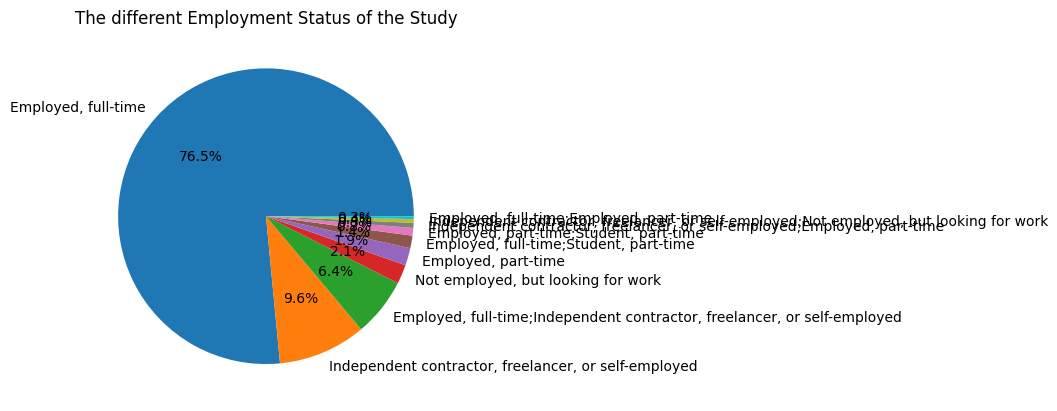

In [241]:
# STEP-0: Get to know the content of the 'Employment' column
if VERBOSE > 2:
    print(f"\n[INFO][SURVEY] The \'Employment\' column of the survey contains the following answers:")
    print(df['Employment'].value_counts(dropna=False))
if VERBOSE > 1:    
    pie_chart(df_developers.Employment.value_counts(), 
              'The different Employment Status of the Survey', fig_save=False)

# STEP-1: Create a subset of the dataset containing only professional developers who are employed.
#         We use the question "_ID296/Employment/Which of the following best describes your current employment status?_".
df_active_developers = df_developers[
                        ~(df_developers['Employment'].str.contains('Student, full-time') |
                          df_developers['Employment'].str.contains('Not employed, and not looking for work') | 
                          df_developers['Employment'].str.contains('I prefer not to say'))]
# Futher remove a few employment status
df_active_developers = df_active_developers[
                        ~df_active_developers['Employment'].isin(['Student, part-time',
                                                                  'Retired'])]
active_developers = df_active_developers.shape[0]
print(f"[INFO][STUDY] Our investigation will solely focus on the population of \'active developers by profession\' who are {active_developers} and represent {(100*active_developers/respondents):.1f}% of the respondents.")

# STEP-2: Display the resulting pie chart
if VERBOSE > 2:
    print(f"\n[INFO][STUDY] The \'Employment\' column of the study contains the following answers:")
    print(df_active_developers.Employment.value_counts().head(30))
if VERBOSE > 1:    
    pie_chart(df_active_developers.Employment.value_counts(), 
              'The different Employment Status of the Study', fig_save=False)

### 3.3- Refining the statistical population per language
The survey collects responses from people having developed in various programming and scripting languages.
Because we are only interested by the usage of the Rust language, we will drop all the responents who are not a Rust user, a Rust lover or a Rust admirer.
- We define a Rust **user** as a respondent who has done extensive development work in Rust over the past year.
- We define a Rust **admirer** as a respondent who wants to work in Rust over the next year.
- We define a Rust **lover** as a respondent who is both a Rust **lover** and a Rust **admirer**.  


[INFO][SURVEY] The 'LanguageHaveWorkedWith' column of the survey contains the following answers:
LanguageHaveWorkedWith
NaN                                                                                                   2044
HTML/CSS;JavaScript;TypeScript                                                                        1487
Python                                                                                                1132
HTML/CSS;JavaScript                                                                                    735
HTML/CSS;JavaScript;PHP;SQL                                                                            718
                                                                                                      ... 
Bash/Shell (all shells);C;C#;Java;JavaScript;Perl;PHP;Python;SQL                                         1
Assembly;C;JavaScript;MATLAB;SQL                                                                         1
C#;Crystal             

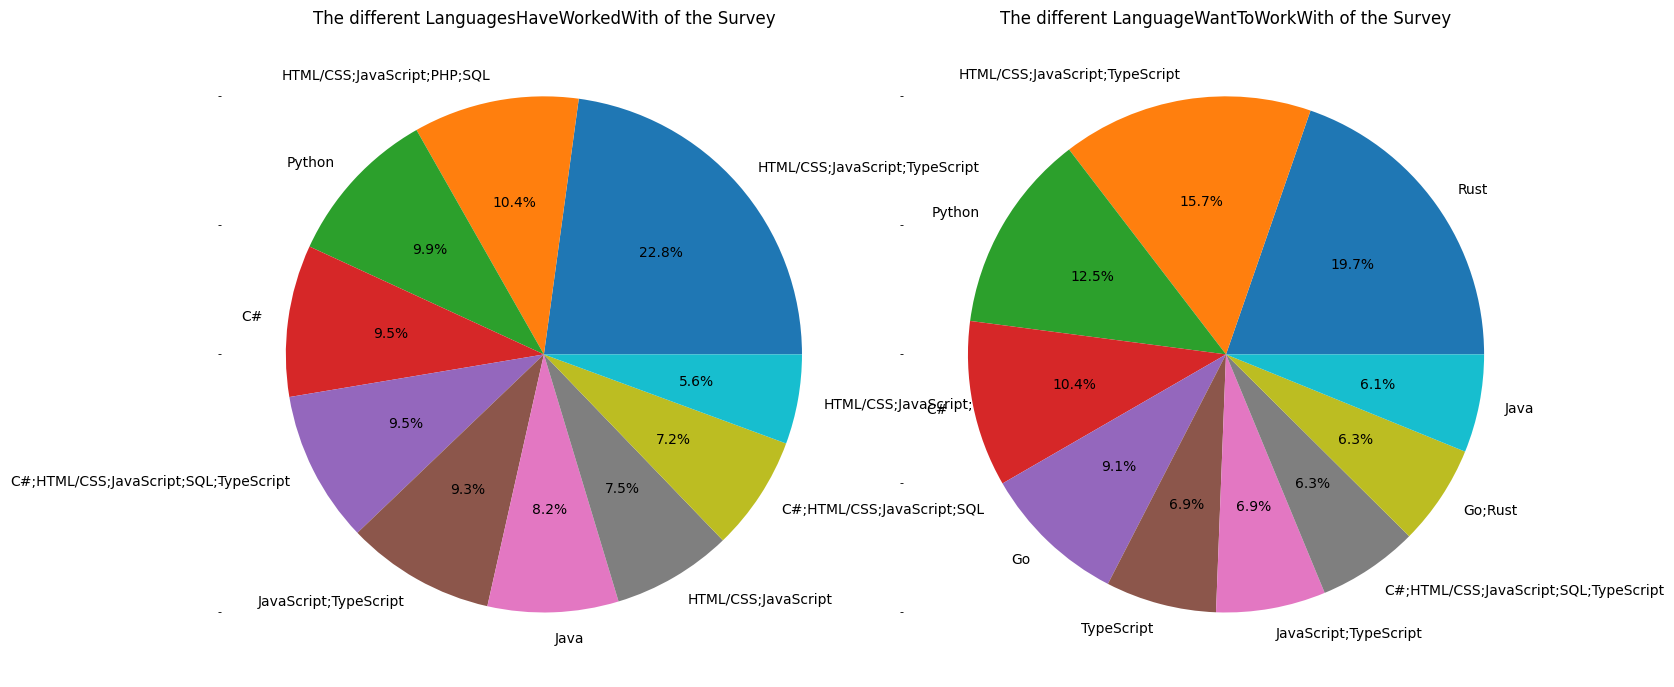

[INFO][STUDY] Our investigation will focus on a population of 7045 Rust users and 18410 Rust admirers who represent 7.9% and 20.6% of the respondents respectively.
[INFO][STUDY] They are 5984 Rust lovers among the Rust users, and they represents 84.9% of the Rust users.


In [242]:
# STEP-0: Get to know the content of the 'Language' columns
if VERBOSE > 2:
    print(f"\n[INFO][SURVEY] The \'LanguageHaveWorkedWith\' column of the survey contains the following answers:")
    print(df['LanguageHaveWorkedWith'].value_counts(dropna=False))
    print(f"\n[INFO][SURVEY] The \'LanguageWantToWorkWith\' column of the survey contains the following answers:")
    print(df['LanguageWantToWorkWith'].value_counts(dropna=False))
if VERBOSE > 1:    
    two_pie_chart(df_developers.LanguageHaveWorkedWith.value_counts(),
                  'The different LanguagesHaveWorkedWith of the Survey',
                  df_developers.LanguageWantToWorkWith.value_counts(),
                  'The different LanguageWantToWorkWith of the Survey',
                  mode='row',
                  fig_title='Survey answers for \'LanguageHaveWorkedWith\' and \'LanguageWantToWorkWith\' ',  
                  fig_save=False)

# STEP-1: Create a subset of the dataset containing only active employed professional developers who are a Rust user or a Rust admirer.
#         We use the question "_ID233/Language/Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?_".
df_rust_users    = df_active_developers[(df_active_developers['LanguageHaveWorkedWith'].str.contains('Rust', na=False))]
df_rust_admirers = df_active_developers[(df_active_developers['LanguageWantToWorkWith'].str.contains('Rust', na=False))]
rust_users    = df_rust_users.shape[0]
rust_admirers = df_rust_admirers.shape[0]
print(f"[INFO][STUDY] Our investigation will focus on a population of {rust_users} Rust users and {rust_admirers} Rust admirers who represent {(100*rust_users/respondents):.1f}% and {(100*rust_admirers/respondents):.1f}% of the respondents respectively.")

# STEP-2: Create the 'df_rust_lovers' by joining the Rust users and the Rust 'admirers'.
# df_active_developers['RustLovers'] = df["FormalEducation"].apply(higher_ed)
df_rust_lovers = pd.merge(df_rust_users, df_rust_admirers, how='inner')
rust_lovers = df_rust_lovers.shape[0]
print(f"[INFO][STUDY] They are {rust_lovers} Rust lovers among the Rust users, and they represents {(100*rust_lovers/rust_users):.1f}% of the Rust users.")


## 4- BUSINESS QUESTIONS

### 4.1- What are the job types of the Rust lovers and which are the best paying ones?
In this section, we try to get an idea of the type of job and development work that the **Rust lovers** are doing in their daily life. Remember that the Rust lovers are the respondents who have you done extensive development work in Rust over the **past year**, and who want to continue working in Rust over the **next year**.   


[INFO][STUDY] The 'DevType' column of 'df_rust_lovers' contains the following answers:
DevType
Developer, full-stack                            2010
Developer, back-end                              1411
Developer, embedded applications or devices       353
Developer, desktop or enterprise applications     271
Other (please specify):                           169
Developer, front-end                              166
Research & Development role                       157
Cloud infrastructure engineer                     128
DevOps specialist                                 125
Developer, game or graphics                       119
Engineering manager                               117
Senior Executive (C-Suite, VP, etc.)              117
Data scientist or machine learning specialist     114
Blockchain                                        113
Engineer, data                                     85
Developer, mobile                                  80
Academic researcher                     

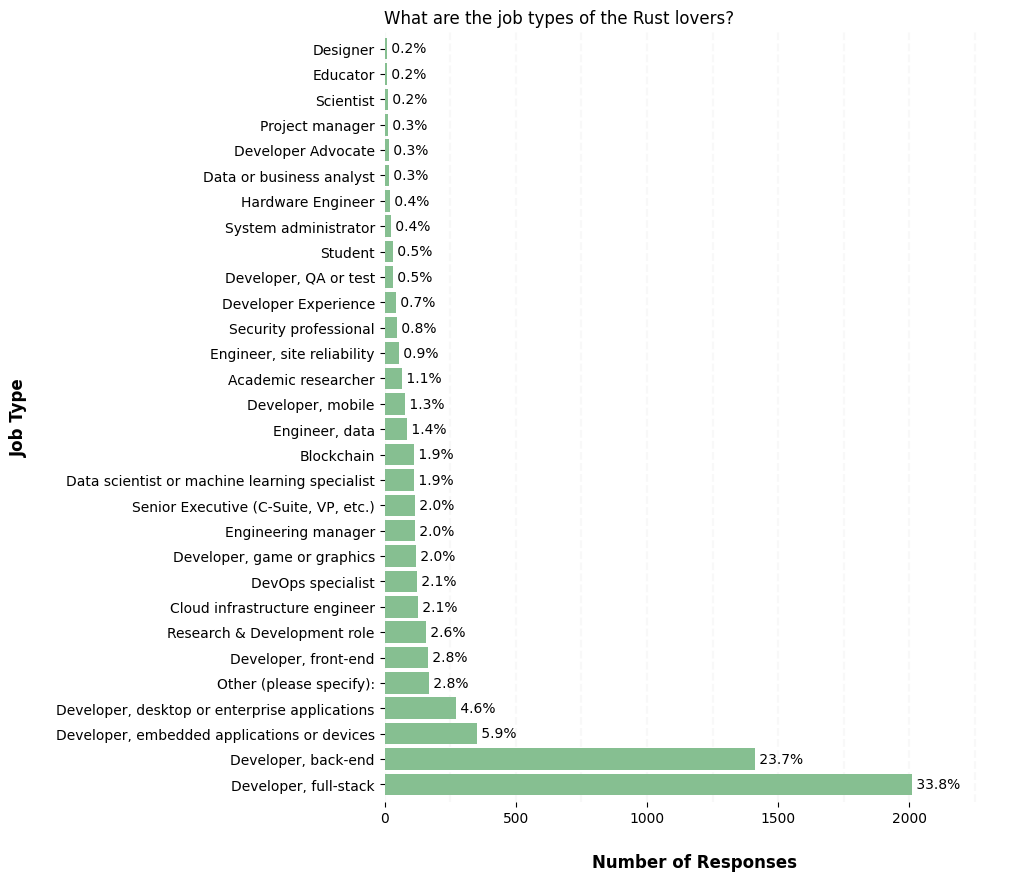

In [319]:
# STEP-0: Get to know the content of the 'DevType' column
if VERBOSE > 2:
    print(f"\n[INFO][STUDY] The \'DevType\' column of 'df_rust_lovers' contains the following answers:")
    print(df_rust_lovers['DevType'].value_counts(dropna=True))

# STEP-1: Show me the kinds of development types that the Rust lovers are doing
barh_chart(df_rust_lovers.DevType.value_counts(dropna=True), 
           'What are the job types of the Rust lovers?', color='#86bf91', fig_save=False)


[INFO][STUDY] The median Rust salaries per job type are as folows:
The name of series is: ConvertedCompYearly 
DevType
Educator                                          46439.0
Project manager                                   52489.0
System administrator                              53214.0
Hardware Engineer                                 54707.5
Database administrator                            55858.0
Data or business analyst                          56500.0
Academic researcher                               63181.5
Marketing or sales professional                   70344.0
Product manager                                   72285.5
Developer, front-end                              73892.0
Developer, QA or test                             74187.5
Developer, game or graphics                       75000.0
Developer, desktop or enterprise applications     77087.5
Developer, full-stack                             80317.0
DevOps specialist                                 81859.0
Developer,

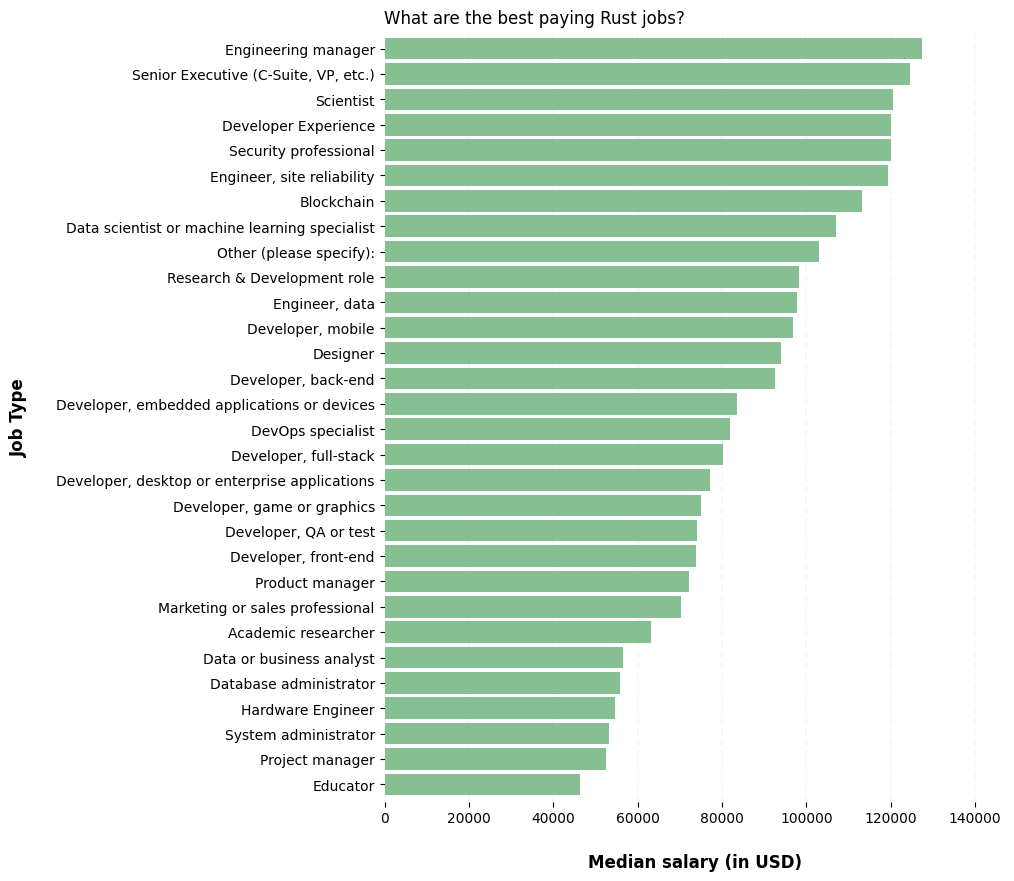

In [331]:
sr_rust_salaries = df_rust_lovers.groupby('DevType').median(numeric_only=True)['ConvertedCompYearly'].sort_values()

if VERBOSE > 2:
    print(f"\n[INFO][STUDY] The median Rust salaries per job type are as folows:")
    print(f"The name of series is: {sr_rust_salaries.name} ")
    print(sr_rust_salaries)

# STEP-2: Show me the average Rust salary per development types
barh_chart(sr_rust_salaries, 'What are the best paying Rust types of jobs?', color='#86bf91', fig_save=False)

### 4.2- What are the development languages of the Rust admirers?
In this section, we try to get an idea of the type programming and scripting languages that the **Rust admirers** are using in their daily life. Remember that the Rust admirers are the respondents who have you done extensive development work in a given language over the **past year**, and who want in Rust over the **next year**.


## BACKUP

In [309]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [291]:
df_rust_lovers.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,5984.000000,4.342000e+03,3900.000000,4.328000e+03
mean,39360.735461,8.106496e+06,10.039487,1.170083e+05
std,25426.418315,1.452466e+08,7.942857,1.242077e+05
min,8.000000,0.000000e+00,0.000000,1.000000e+00
25%,16414.750000,7.000000e+04,4.000000,5.528500e+04
50%,36256.500000,1.200000e+05,8.000000,8.689700e+04
75%,61170.500000,2.300000e+05,14.000000,1.435712e+05
max,89128.000000,5.435736e+09,50.000000,2.700000e+06


In [296]:
df_rust_lovers.shape

(5984, 84)

array([[<Axes: title={'center': 'ResponseId'}>,
        <Axes: title={'center': 'CompTotal'}>],
       [<Axes: title={'center': 'WorkExp'}>,
        <Axes: title={'center': 'ConvertedCompYearly'}>]], dtype=object)

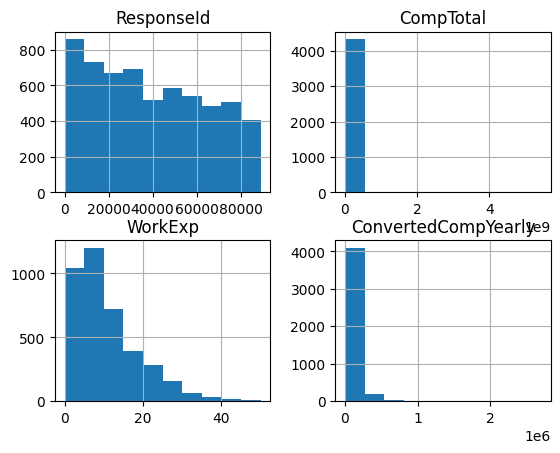

In [294]:
df_rust_lovers.hist()

In [292]:
# Proportion of missing compensation values (can we work with this column)
missing_value = df_rust_lovers['ConvertedCompYearly'].isnull().mean()
missing_value

0.2767379679144385

DevType
Educator                                          46215.714286
System administrator                              59574.100000
Marketing or sales professional                   70344.000000
Data or business analyst                          84881.222222
Developer, QA or test                             85957.150000
Hardware Engineer                                 88497.714286
Developer, front-end                              91711.085938
Project manager                                   97571.900000
Developer, full-stack                             99598.007586
Developer, desktop or enterprise applications     99667.718750
Product manager                                  104766.833333
Developer, embedded applications or devices      108057.981273
DevOps specialist                                111265.500000
Designer                                         116283.166667
Developer, game or graphics                      120394.727273
Academic researcher                            

<Axes: >

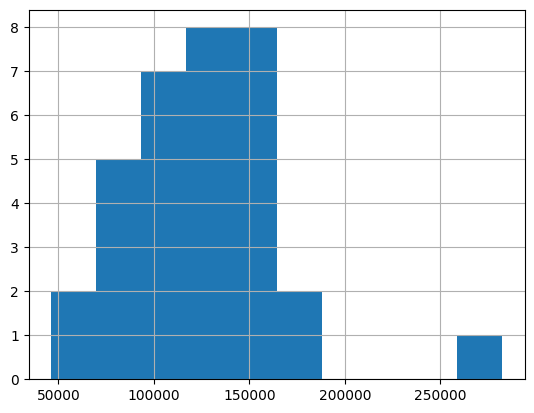

In [357]:
df_rust_users['LanguageWantToWorkWith']

7        Elixir;Go;Julia;Python;R;Rust;Scala;SQL;TypeSc...
26          Bash/Shell (all shells);Go;PHP;Rust;TypeScript
37         Ada;Go;Kotlin;Lisp;Python;R;Rust;SQL;TypeScript
45                                                 Go;Rust
64                 HTML/CSS;JavaScript;PHP;Python;Rust;SQL
                               ...                        
89079                                                  NaN
89080    C#;Dart;HTML/CSS;JavaScript;Lua;Rust;SQL;TypeS...
89098                              C++;Go;Java;Kotlin;Rust
89123             C++;Fortran;Haskell;Lisp;Python;Rust;SQL
89127                            Elixir;Erlang;Python;Rust
Name: LanguageWantToWorkWith, Length: 7045, dtype: object

In [547]:


def rust_dependency_graph(df_admirers, df_users, render='both'):
    """
    Builds a graph showing the daily programming language used by the Rust admirers, as well as the languages that the Rust users want to work with. 
    
    Parameters:
      df_admirers (DataFrame): The Rust admirers
      df_users (DataFrame): The Rust users
      render (string): The rendering mode (both|admirers|users) 
      fig_title(string): The name of the figure to save.
      fig_save (boolean): Will keep a copy of the figure in './images/' directory)
    """
    
    # Create a pandas DataFrame with the dependencies
    Nodes = {
        'Names'    : [ 'Rust'  ],
        'Colors'   : ['#86bf91'],
        'Children' : [   []  ],
        'Weights'  : [   []  ]
    }
   
    # Drop rows with missing language values
    df_users = df_users.dropna(subset=['LanguageWantToWorkWith'])
    
    # === RUST USERS ============================================
    if render == 'both' or render == 'users': 
        for id, row in df_users.iterrows():
            # Access row values using row[column_name]
            next_languages = row['LanguageWantToWorkWith'].split(';')
            for language in next_languages:
                dst_lang = language + '_'
                if dst_lang in Nodes['Children'][0]:
                    # Retrieve the position in the list
                    index = Nodes['Children'][0].index(dst_lang)
                    Nodes['Weights'][0][index] += 1       
                else:
                    # Add a new child to the Rust node 
                    Nodes['Children'][0].append(dst_lang)
                    Nodes['Weights'][0].append(1)
    
    # === RUST ADMIRERS =========================================
    if render == 'both' or render == 'admirers': 
        for id, row in df_admirers.iterrows():
            # Access row values using row[column_name]
            curr_languages = row['LanguageHaveWorkedWith'].split(';')
            for language in curr_languages:
                src_lang = '_' + language
                if src_lang in Nodes['Names']:
                    # Retrieve the position in the list
                    index = Nodes['Names'].index(src_lang)
                    # Increment the 'Rust' child
                    Nodes['Weights'][index][0] += 1       
                else:
                    # Add a new node to the graph 
                    Nodes['Names'].append(src_lang)
                    Nodes['Colors'].append('#FF5354')
                    # Create a 'Rust' child for this node
                    Nodes['Children'].append(['Rust'])
                    Nodes['Weights'].append([1])

    # print(f"===========================")    
    # print(f"NODES   ={Nodes['Names']}")
    # print(f"COLORS  ={Nodes['Colors']}")
    # print(f"CHILDREN={Nodes['Children']}")
    # print(f"WEIGHTS ={Nodes['Weights']}")

    # === DRAW GRAPH ============================================
    df = pd.DataFrame(Nodes)
   
    # Create an empty graph
    graph = nx.DiGraph()

    #if render == 'both':
    # Add the 'FROM-LANGUAGE' nodes to the graph
    for id, node in enumerate(df['Names']):
        if node == 'Rust':
            graph.add_node(node, color='#86bf91')
        else:
            graph.add_node(node, color='#FF5354')
    
    # if render == 'both' or render == 'users': 
    # Add the 'TO_LANGUAGE' nodes to the graph
    for id1, children in enumerate(df['Children']):
        for id2, node in enumerate(children):
            if node != 'Rust':
                graph.add_node(node, color='#0095FF')
    
    #if render == 'both':
    # Add edges to the graph
    for node, children in zip(df['Names'], df['Children']):
        for child in children:
            graph.add_edge(node, child)

    # Construct the color map for the nodes 
    color_map = list((nx.get_node_attributes(graph, 'color')).values())

    # Visualize the graph
    plt.figure(figsize=(16, 14))
    if render == "admirers":
        pos = nx.spring_layout(graph)
    else:
        pos = nx.spring_layout(graph)
    nx.draw_networkx(graph, pos, with_labels=True, node_color=color_map, node_size=1000, edge_color='gray', arrows=True)
    plt.title('Dependency Graph')
    plt.show()

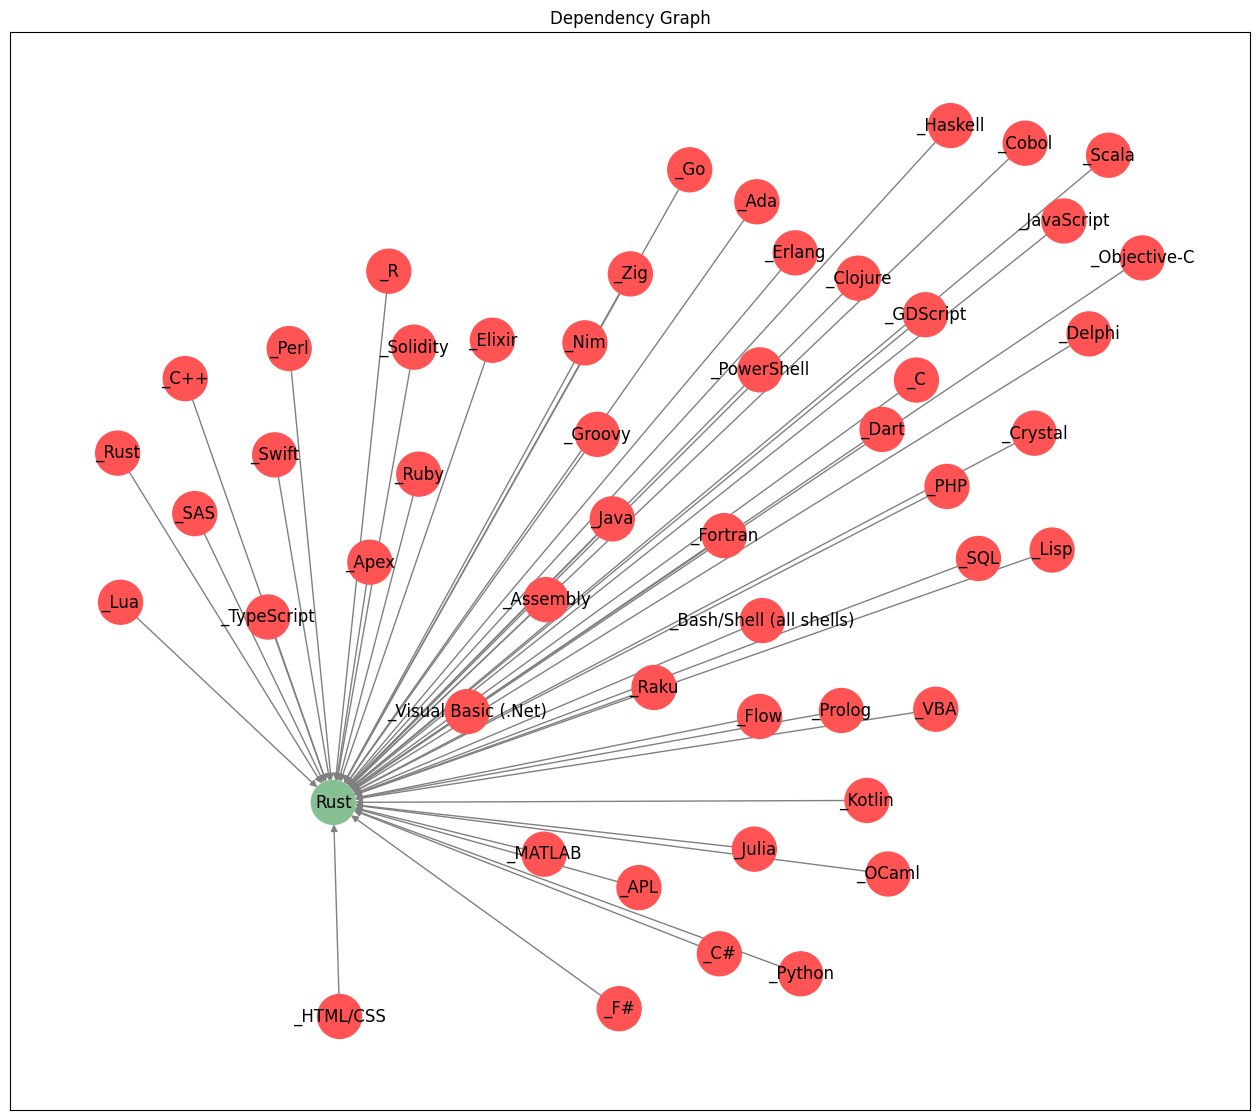

In [546]:
rust_dependency_graph(df_rust_admirers, df_rust_users, 'admirers')

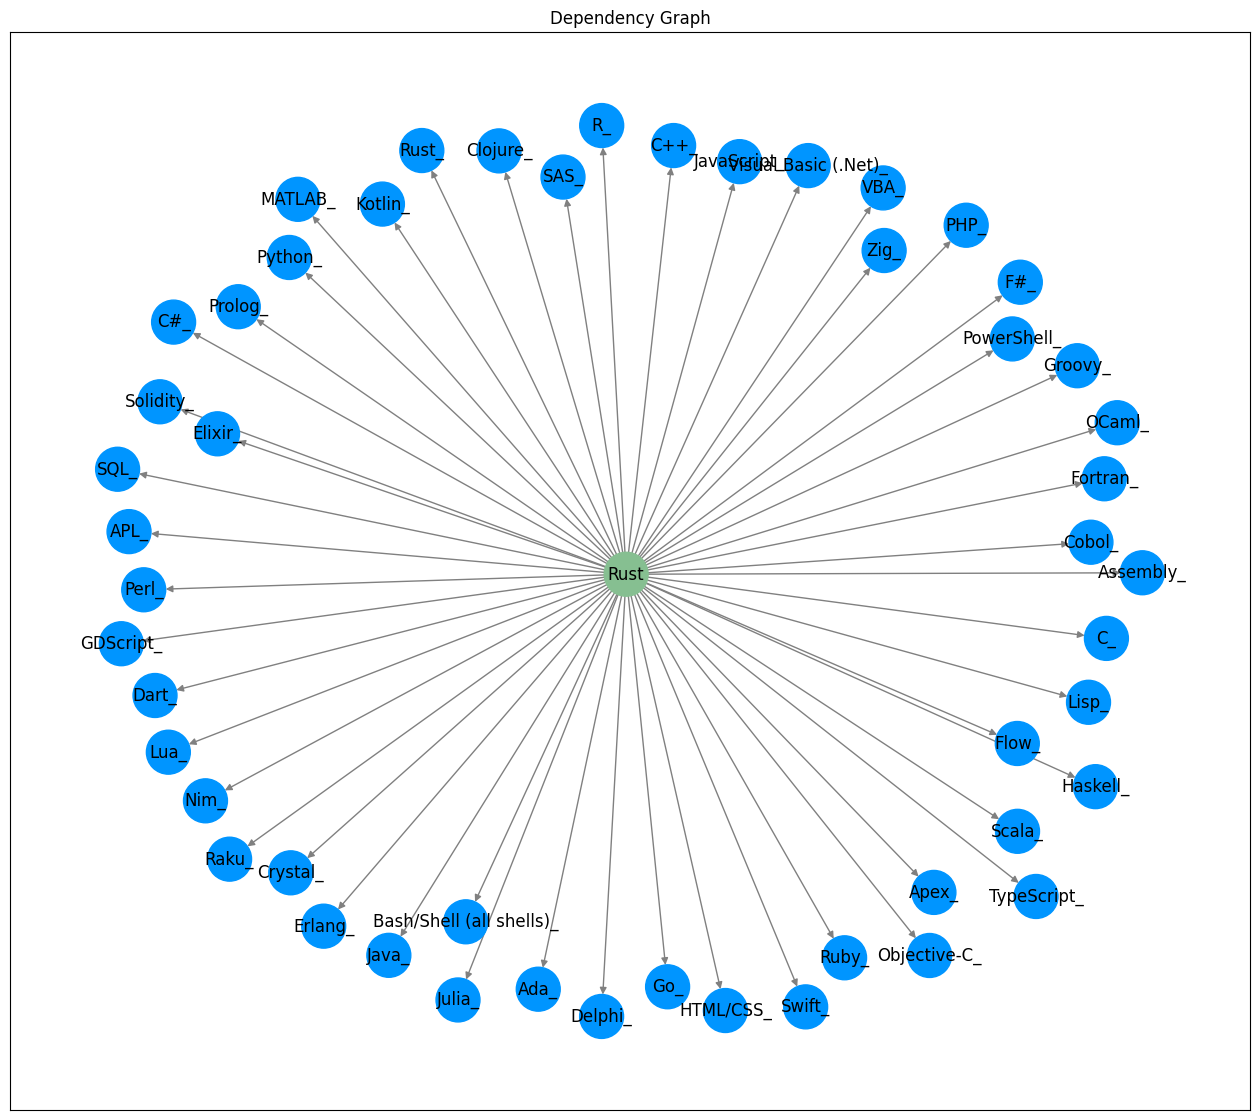

In [548]:
rust_dependency_graph(df_rust_admirers, df_rust_users, 'users')

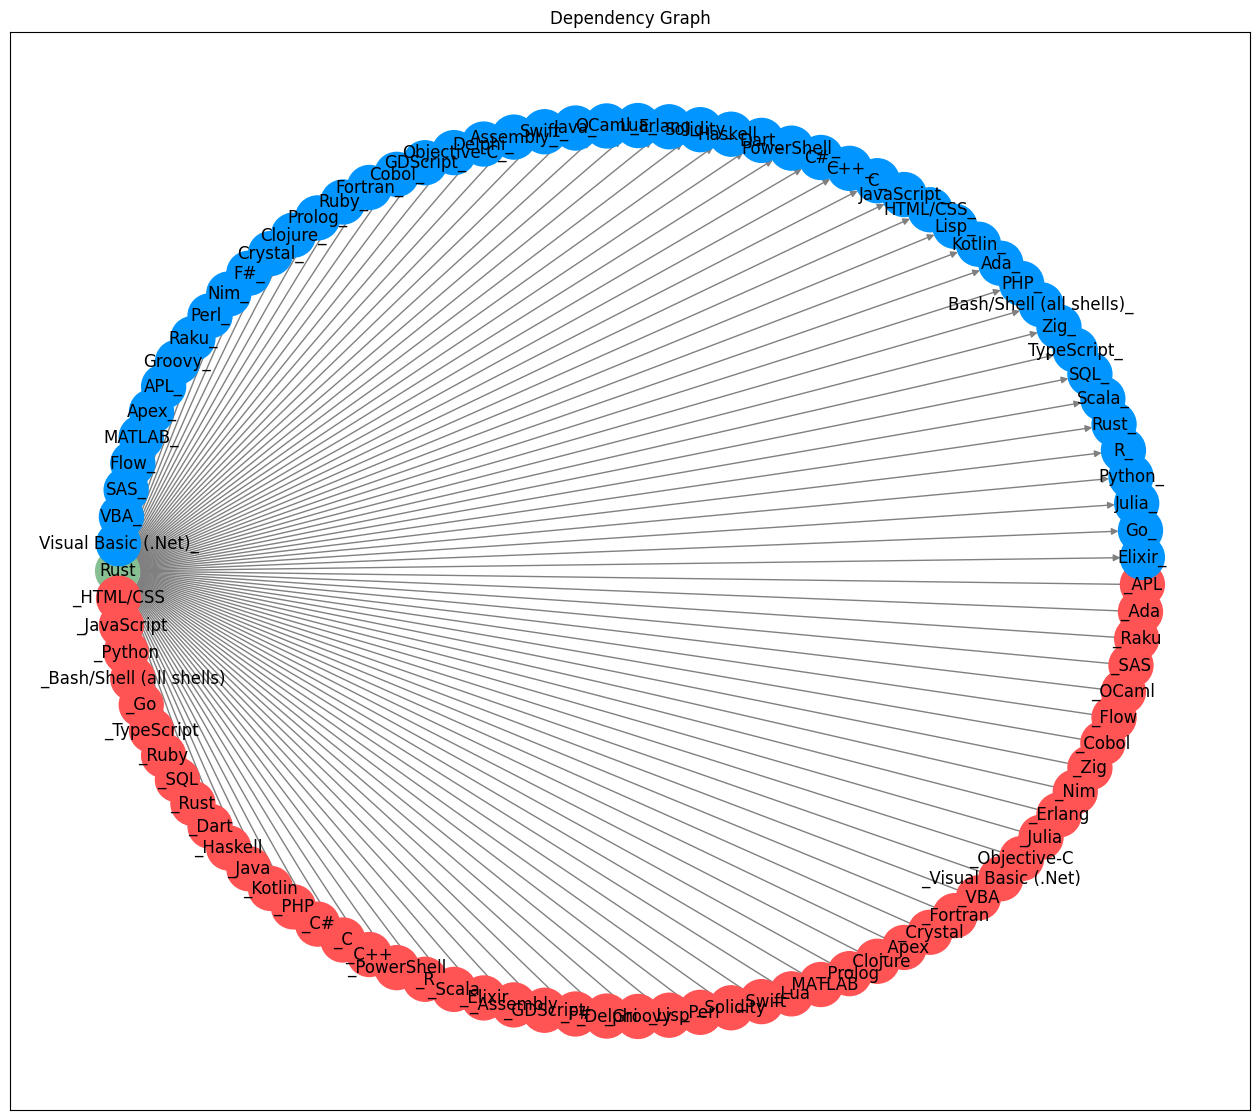

In [540]:
# Plot dependency graph with both admirers and users languages
rust_dependency_graph(df_rust_admirers, df_rust_users, 'both')

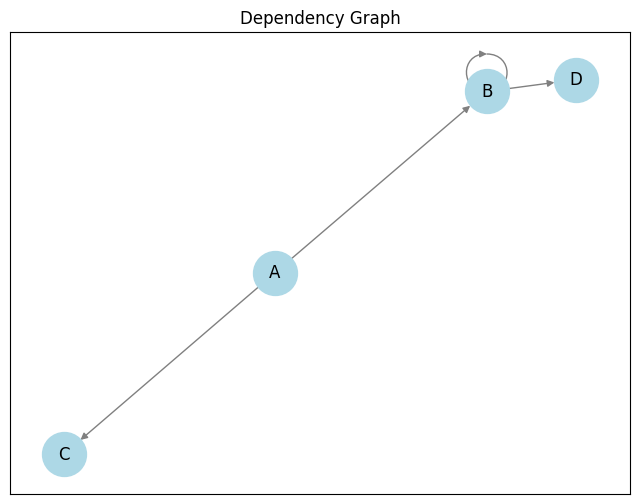

In [375]:
import networkx as nx

# Create a pandas DataFrame with the dependencies
data = {
    'Node'      : ['A', 'B', 'C', 'D'],
    'Dependency': [['B', 'C'], ['B','D'], [], []]
}
df = pd.DataFrame(data)

# Create an empty graph
graph = nx.DiGraph()

# Add nodes to the graph
graph.add_nodes_from(df['Node'])

# Add edges to the graph
for node, dependencies in zip(df['Node'], df['Dependency']):
    for dependency in dependencies:
        graph.add_edge(node, dependency)

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos, with_labels=True, node_color='lightblue', node_size=1000, edge_color='gray', arrows=True)
plt.title('Dependency Graph')
plt.show()